In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
traffic=pd.read_csv("traffic.csv")
traffic.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,00:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,00:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,00:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,00:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,00:00:31,Showers,slightly congested


In [10]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    16388 non-null  object
 1   Day                     16388 non-null  object
 2   Destination_Location    16388 non-null  object
 3   Fastest_Route_Distance  16388 non-null  int64 
 4   Fastest_Route_Name      16388 non-null  object
 5   Fastest_Route_Time      16388 non-null  int64 
 6   Holiday                 16388 non-null  object
 7   Special_Condition       16388 non-null  object
 8   Starting_Location       16388 non-null  object
 9   Sys_Time                16388 non-null  object
 10  Weather                 16388 non-null  object
 11  Data_prediction         16388 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


In [11]:
traffic.describe()

,Fastest_Route_Distance,Fastest_Route_Time
count,16388.000000,16388.000000
mean,1608.768611,150.915304
std,853.399148,80.324398
min,1000.000000,60.000000
25%,1000.000000,120.000000
50%,1200.000000,120.000000
75%,2100.000000,180.000000
max,3900.000000,480.000000


In [13]:
traffic.columns

Index(['Date', 'Day', 'Destination_Location', 'Fastest_Route_Distance',
       'Fastest_Route_Name', 'Fastest_Route_Time', 'Holiday',
       'Special_Condition', 'Starting_Location', 'Sys_Time', 'Weather',
       'Data_prediction'],
      dtype='object')

In [23]:
traffic.tail()

,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Starting_Location,Weather,Data_prediction
16383,Friday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,centaurus,Clear,smooth
16384,Friday,roshan_plaza,2700,Jinnah Ave,180,crown_plaza,Clear,smooth
16385,Friday,salt_and_pepper,3900,Jinnah Ave,300,roshan_plaza,Clear,slightly congested
16386,Friday,bar_bq_tonight,1600,Jinnah Ave,180,salt_and_pepper,Clear,congested
16387,Friday,D_chowk,2100,A.K. Fazl-ul-Haq Rd and Jinnah Ave,300,bar_bq_tonight,Clear,slightly congested


In [16]:
traffic.groupby('Data_prediction').size()

Data_prediction
blockage                57
congested              903
highly congested      5713
slightly congested    1676
smooth                8039
dtype: int64

In [17]:
traffic['Holiday'].value_counts()

no    16388
Name: Holiday, dtype: int64

In [18]:
traffic['Special_Condition'].value_counts()

no    16388
Name: Special_Condition, dtype: int64

In [19]:
traffic=traffic.drop(['Date','Holiday','Special_Condition','Sys_Time'],1)

<ipython-input-19-78735a9923b3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  traffic=traffic.drop(['Date','Holiday','Special_Condition','Sys_Time'],1)


In [20]:
traffic['Day'].value_counts()

Friday       5300
Thursday     4132
Wednesday    1948
Sunday       1547
Saturday     1538
Monday       1195
Tuesday       728
Name: Day, dtype: int64

In [24]:
traffic['Destination_Location'].value_counts()

9th_avenue                              1370
centaurus                               1370
crown_plaza                             1370
roshan_plaza                            1370
salt_and_pepper                         1367
capital_gymkhana                        1366
missile_chowk                           1364
bar_bq_tonight                          1363
pak_turk_maarif_international_school    1363
childrens_park                          1362
jamia_masjid                            1362
D_chowk                                 1361
Name: Destination_Location, dtype: int64

In [25]:
traffic['Starting_Location'].value_counts()

capital_gymkhana                        1370
9th_avenue                              1370
centaurus                               1370
crown_plaza                             1370
roshan_plaza                            1367
missile_chowk                           1366
jamia_masjid                            1364
salt_and_pepper                         1363
childrens_park                          1363
bahria_foundation_school                1362
pak_turk_maarif_international_school    1362
bar_bq_tonight                          1361
Name: Starting_Location, dtype: int64

In [26]:
traffic['Fastest_Route_Name'].value_counts()

Nazim-ud-din Rd                            5451
Jinnah Avenue                              4106
Jinnah Ave                                 4098
Jinnah Avenue and Faisal Avenue Flyover    1370
A.K. Fazl-ul-Haq Rd and Jinnah Ave         1361
Nazim-ud-din Rd and Jinnah Ave                1
A.K. Fazl-ul-Haq Rd                           1
Name: Fastest_Route_Name, dtype: int64

In [27]:
traffic['Weather'].value_counts()

Clear            4464
Sunny            3192
Cloudy           2948
Mostly Cloudy    1411
Showers          1236
Mostly Sunny     1177
Partly Cloudy    1172
Mostly Clear      668
Rain              120
Name: Weather, dtype: int64

In [28]:
traffic['Data_prediction'].value_counts()

smooth                8039
highly congested      5713
slightly congested    1676
congested              903
blockage                57
Name: Data_prediction, dtype: int64

Text(0.5, 0, 'prediction')

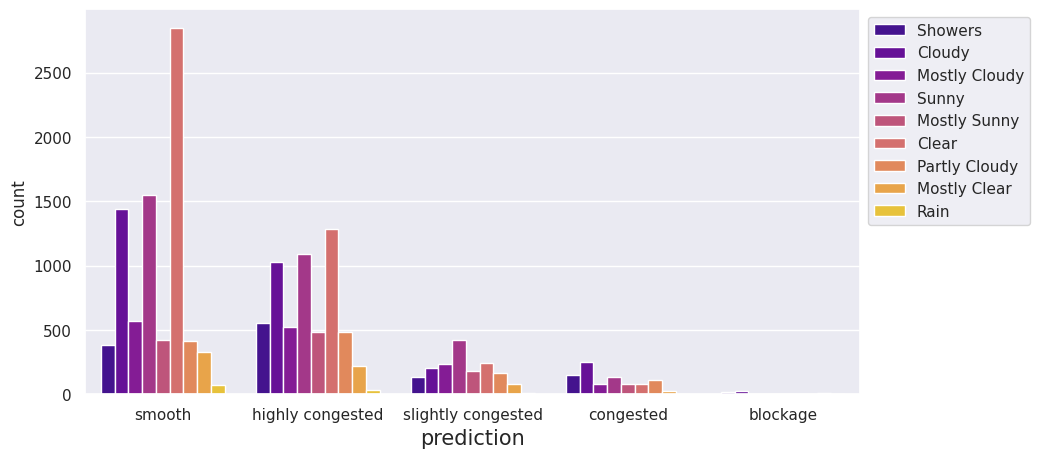

In [31]:
plt.rcParams['figure.figsize']=(10,5)
sns.set_theme(style='darkgrid')
vplt1=sns.countplot(data=traffic,x='Data_prediction',hue='Weather',palette='plasma',saturation=0.8)
vplt1.legend(bbox_to_anchor=(1,1),loc='upper left')
vplt1.set_xlabel('prediction',fontsize=15)

Text(0.5, 0, 'prediction')

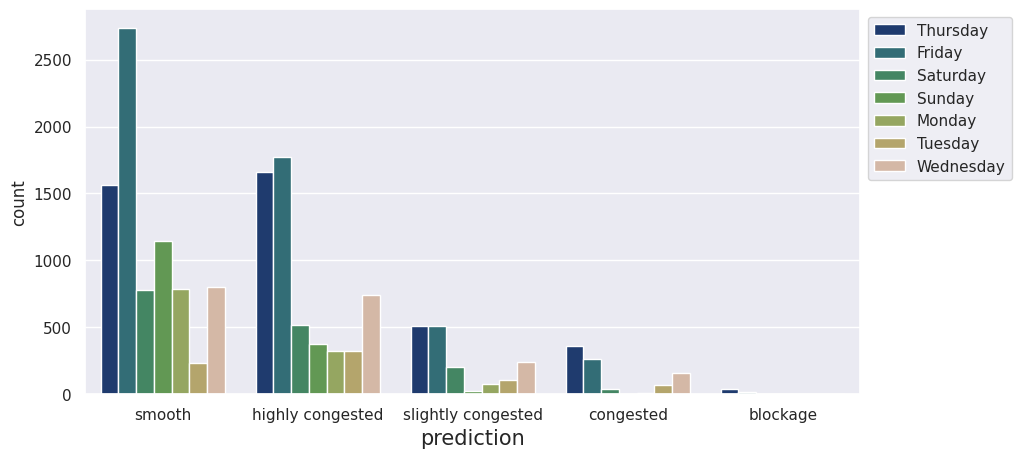

In [32]:
plt.rcParams['figure.figsize']=(10,5)
sns.set_theme(style='darkgrid')
vplt2=sns.countplot(data=traffic,x='Data_prediction',hue='Day',palette='gist_earth',saturation=0.8)
vplt2.legend(bbox_to_anchor=(1,1),loc='upper left')
vplt2.set_xlabel('prediction',fontsize=15)

Text(0, 0.5, 'Fastest_Route_Time')

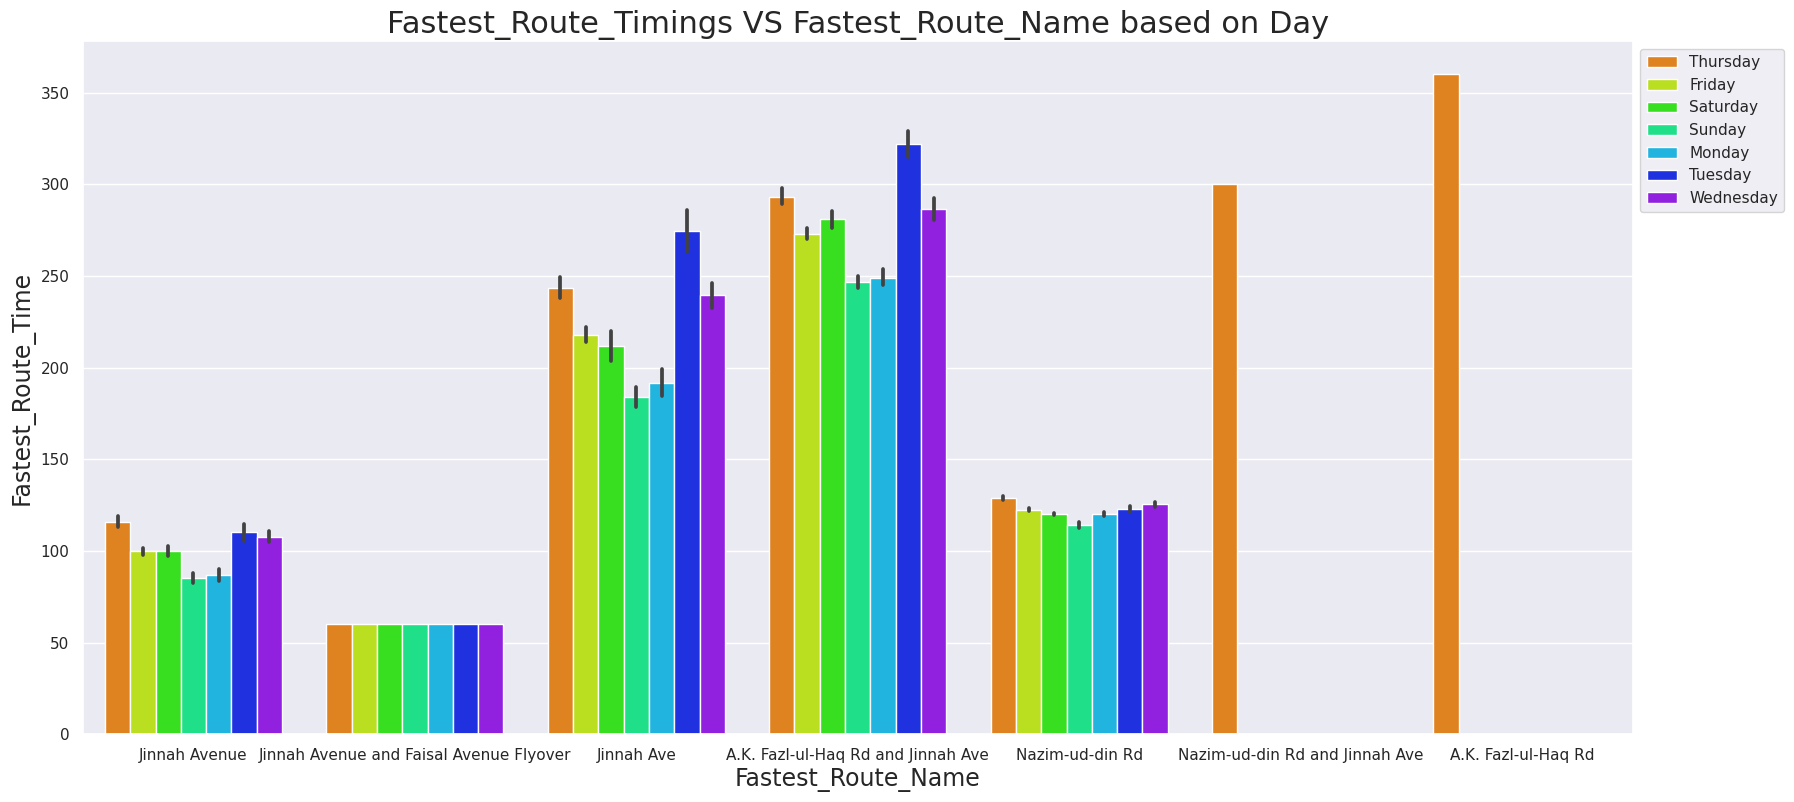

In [34]:
plt.rcParams['figure.figsize']=(20,9)
sns.set_theme(style='darkgrid')
vplt3=sns.barplot(data=traffic,x='Fastest_Route_Name',y='Fastest_Route_Time',hue='Day',palette='gist_rainbow')
vplt3.legend(bbox_to_anchor=(1,1))
plt.title('Fastest_Route_Timings VS Fastest_Route_Name based on Day',fontsize=22)
vplt3.set_xlabel('Fastest_Route_Name',fontsize=17)
vplt3.set_ylabel('Fastest_Route_Time',fontsize=17)

In [35]:
traffic['Day'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
16383    Thursday
16384    Thursday
16385    Thursday
16386    Thursday
16387    Thursday
Name: Day, Length: 16388, dtype: object

In [36]:
traffic['Destination_Location'].replace(['9th_avenue','centaurus','roshan_plaza','salt_and_pepper','capital_gymkhana','missile_chowk','bar_bq_tonight','pak_turk_maarif_international_school','childrens_park','jamia_masjid','D_chowk '])

0         9th_avenue
1         9th_avenue
2        crown_plaza
3        crown_plaza
4        crown_plaza
            ...     
16383    crown_plaza
16384    crown_plaza
16385    crown_plaza
16386    crown_plaza
16387        D_chowk
Name: Destination_Location, Length: 16388, dtype: object

In [37]:
traffic['Starting_Location'].replace(['9th_avenue','centaurus','roshan_plaza','salt_and_pepper','capital_gymkhana','missile_chowk','bar_bq_tonight','pak_turk_maarif_international_school','childrens_park','jamia_masjid','D_chowk '])

0                capital_gymkhana
1                capital_gymkhana
2                capital_gymkhana
3                     crown_plaza
4                     crown_plaza
                   ...           
16383    bahria_foundation_school
16384                 crown_plaza
16385                 crown_plaza
16386                 crown_plaza
16387                 crown_plaza
Name: Starting_Location, Length: 16388, dtype: object

In [38]:
traffic['Weather'].replace(['Clear','Sunny','Cloudy','Mostly Cloudy','Showers','Mostly Sunny','Partly Cloudy','Mostly Clear','Rain'])

0        Showers
1        Showers
2        Showers
3        Showers
4        Showers
          ...   
16383    Showers
16384    Showers
16385    Showers
16386    Showers
16387    Showers
Name: Weather, Length: 16388, dtype: object

In [41]:
traffic['Data_prediction'].replace(['smooth','highly congested','slightly congested','congested','blockage'])

0        0
1        1
2        0
3        0
4        2
        ..
16383    0
16384    0
16385    2
16386    3
16387    2
Name: Data_prediction, Length: 16388, dtype: int64

<ipython-input-74-a59649c1928c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=traffic.corr()


<Axes: >

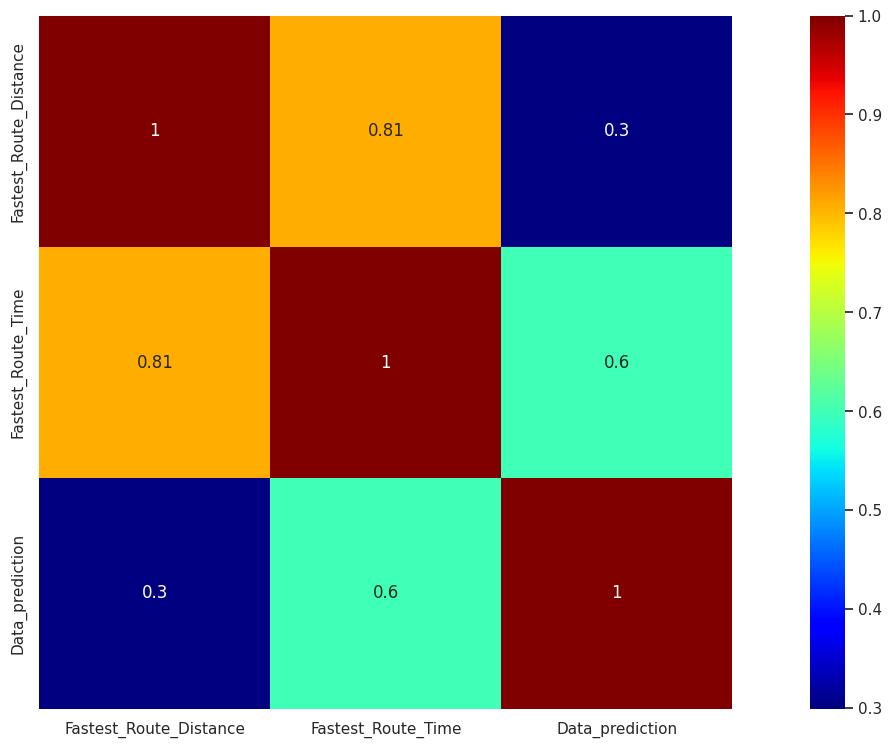

In [74]:
corrmat=traffic.corr()
sns.heatmap(corrmat,cmap='jet',annot=True,square=True)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=traffic.drop("Data_prediction",1)
y=traffic[["Data_prediction"]]

<ipython-input-59-fdaf288ceeca>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=traffic.drop("Data_prediction",1)


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
model=LogisticRegression(random_state=1,solver='lbfgs',max_iter=10000)

In [ ]:
model.fit(x_train,y_train.values.ravel())

In [88]:
x_new=np.array([[5,9,1000,3,120,12,3]])
pred_traf=model.predict(x_new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AttributeError: ignored

In [86]:
if pred_traf==0:
pred_traf='Traffic is Smooth'
elif pred_traf==1:
pred_traf='Traffic is Highly Congested'
elif pred_traf==2:
pred_traf='Traffic is Slightly Congested'
elif pred_traf==3:
pred_traf='Traffic is Congested'
elif pred_traf==4:
pred_traf='Traffic is Blockage'

IndentationError: ignored

In [56]:
print(pred_traf)

NameError: ignored